### Обработка изображений


Напишите на Python реализацию как минимум одного алгоритма на выбор: любая на выбор цветовая обработка, перевод в другое цветовое пространство или фильтрация. Изображение выберите самостоятельно.

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import imageio

## Загрузка цветного изображения

In [64]:
img = imageio.imread('flame.jpeg')
img = img.astype(np.float32) / 255.
print(img.shape)

(1182, 665, 3)


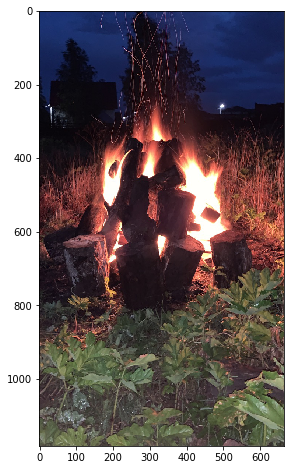

In [108]:
# Оригинальное изображение
plt.figure(figsize=(8, 8))
plt.imshow(img)

#### Про цветовые пространства

https://habr.com/ru/post/181580/ 

https://en.wikipedia.org/wiki/CIELAB_color_space

Обзор методов сегментации изображений в библиотеке scikit-image https://habr.com/ru/post/441006/

In [150]:
from skimage.color import  rgb2lab, rgb2xyz , rgb2hed

[[[0.09411765 0.1882353  0.4392157 ]
  [0.09803922 0.19215687 0.44313726]
  [0.10196079 0.19607843 0.44705883]]

 [[0.09803922 0.19215687 0.44313726]
  [0.09803922 0.19215687 0.44313726]
  [0.09411765 0.1882353  0.4392157 ]]

 [[0.10196079 0.19607843 0.44705883]
  [0.09803922 0.19215687 0.44313726]
  [0.09019608 0.18431373 0.43529412]]]
[[[ 24.  48. 112.]
  [ 25.  49. 113.]
  [ 26.  50. 114.]]

 [[ 25.  49. 113.]
  [ 25.  49. 113.]
  [ 24.  48. 112.]]

 [[ 26.  50. 114.]
  [ 25.  49. 113.]
  [ 23.  47. 111.]]]


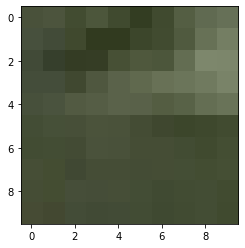

In [123]:
# Просмотр данных в RGB массиве
print(img[:3,:3])
print(img[:3,:3].astype(np.float32) * 255)
plt.imshow(img[980:990,110:120,:3])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


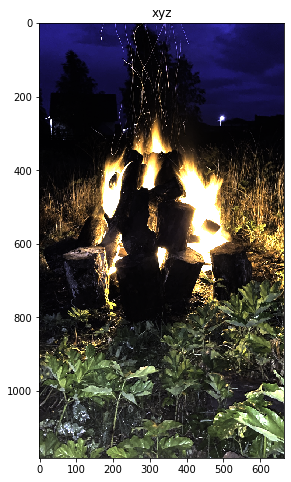

In [140]:
# XYZ - пространство с утроенными значениями
img_xyz = rgb2xyz(img)


plt.figure(figsize=(8, 8))
plt.imshow(img_xyz*3)
plt.title(label  = 'xyz')
plt.show()
   

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

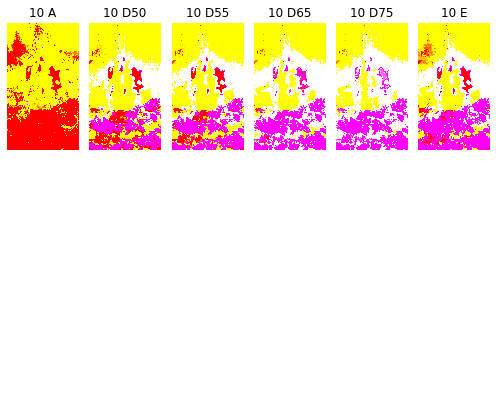

In [176]:
#  LAB - пространство

# Параметры
illuminants = ('A', 'D50', 'D55', 'D65', 'D75', 'E')
observers = ('2', '10')



   
from matplotlib.colors import LinearSegmentedColormap

# Create an artificial color close to the original one
cmap_hema = LinearSegmentedColormap.from_list('mycmap', ['white', 'navy'])
cmap_dab = LinearSegmentedColormap.from_list('mycmap', ['white',
                                             'saddlebrown'])
cmap_eosin = LinearSegmentedColormap.from_list('mycmap', ['darkviolet',
                                               'white'])
ihc_hed = rgb2hed(img)

cols = len(illuminants)
rows = len(observers)



fig, axes = plt.subplots(rows, cols, figsize=(7, 6), sharex=True, sharey=True)
ax = axes.ravel()

for i in range(cols):
    for j in range(rows):
        title =  observers[j] + ' ' +illuminants[i]
        img_lab = rgb2lab(img, illuminant=illuminants[i], observer=observers[j])

        ax[i].imshow(img_lab)
        ax[i].set_title(title)
    
for a in ax.ravel():
    a.axis('off')

fig.tight_layout()

In [178]:
img_lab[:3,:3]

array([[[ 21.86249071,  12.74030139, -42.76561218],
        [ 22.2845702 ,  12.5422166 , -42.74088955],
        [ 22.70644203,  12.34753212, -42.71559901]],

       [[ 22.2845702 ,  12.5422166 , -42.74088955],
        [ 22.2845702 ,  12.5422166 , -42.74088955],
        [ 21.86249071,  12.74030139, -42.76561218]],

       [[ 22.70644203,  12.34753212, -42.71559901],
        [ 22.2845702 ,  12.5422166 , -42.74088955],
        [ 21.4402334 ,  12.94186087, -42.78972031]]])

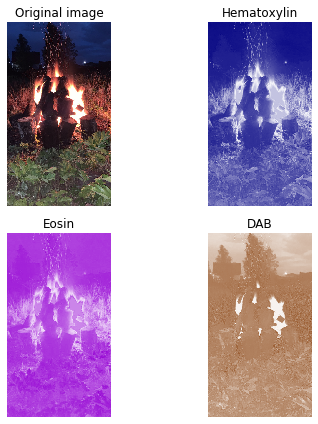

In [179]:
#  HED - пространство

# colors separation
# https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_ihc_color_separation.html#sphx-glr-auto-examples-color-exposure-plot-ihc-color-separation-py



from matplotlib.colors import LinearSegmentedColormap

# Create an artificial color close to the original one
cmap_hema = LinearSegmentedColormap.from_list('mycmap', ['white', 'navy'])
cmap_dab = LinearSegmentedColormap.from_list('mycmap', ['white',
                                             'saddlebrown'])
cmap_eosin = LinearSegmentedColormap.from_list('mycmap', ['darkviolet',
                                               'white'])
ihc_hed = rgb2hed(img)

fig, axes = plt.subplots(2, 2, figsize=(7, 6), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(ihc_rgb)
ax[0].set_title("Original image")

ax[1].imshow(ihc_hed[:, :, 0], cmap=cmap_hema)
ax[1].set_title("Hematoxylin")

ax[2].imshow(ihc_hed[:, :, 1], cmap=cmap_eosin)
ax[2].set_title("Eosin")

ax[3].imshow(ihc_hed[:, :, 2], cmap=cmap_dab)
ax[3].set_title("DAB")

for a in ax.ravel():
    a.axis('off')

fig.tight_layout()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


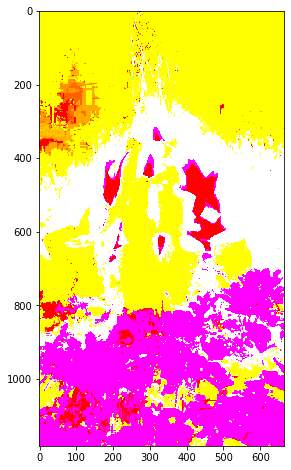

In [181]:
plt.figure(figsize=(8, 8))
plt.imshow(img_lab)
# plt.imshow((img_lab).astype(np.float32))
# plt.imshow(img_lab,vmin=0,vmax=255)

### Ниже - примеры из лекции

## Линейное увеличение яркости
Возможен выход за пределы допустимого диапазона


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


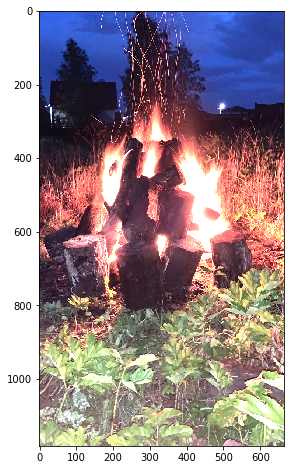

In [5]:
plt.figure(figsize=(8, 8))
plt.imshow(img*2)

## Нелинейное уменьшение яркости

## Нелинейное увеличение яркости

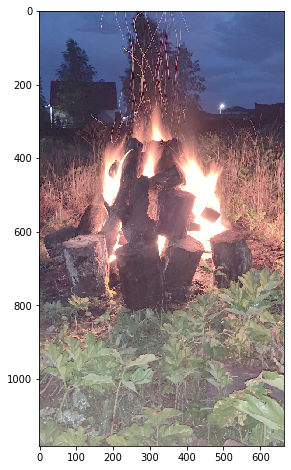

In [7]:
plt.figure(figsize=(8, 8))
plt.imshow(img**0.5) # извлечение квадратного корня

## Получение ЧБ изображения по цветному

In [8]:
img_bw = np.mean(img, axis=2)

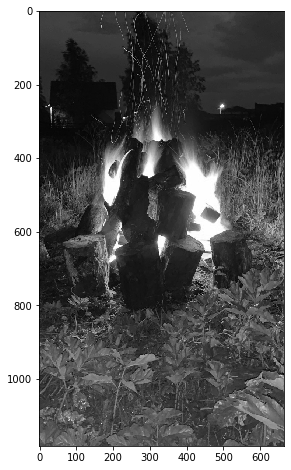

In [9]:
plt.figure(figsize=(8, 8))
plt.imshow(img_bw, cmap='gray')

## Цветовое пространство HSV

In [10]:
from skimage.color import rgb2hsv, hsv2rgb

In [11]:
img_hsv = rgb2hsv(img)

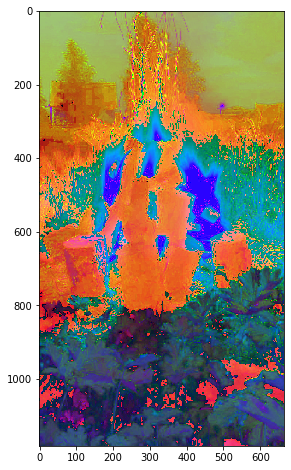

In [13]:
plt.figure(figsize=(8, 8))
plt.imshow(img_hsv)

## Линейное уменьшение насыщенности

In [14]:
img_hsv_new = np.copy(img_hsv)
img_hsv_new[:, :, 1] /= 2
img_new = hsv2rgb(img_hsv_new)

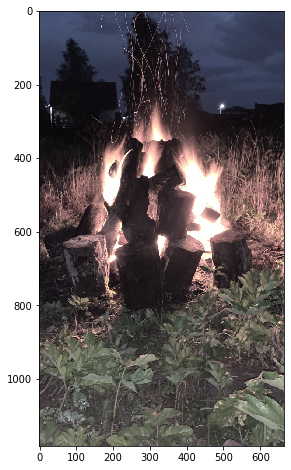

In [15]:
plt.figure(figsize=(8, 8))
plt.imshow(img_new)

## Линейное увеличение насыщенности
Возможен выход за пределы допустимого диапазона

In [16]:
img_hsv_new = np.copy(img_hsv)
img_hsv_new[:, :, 1] *= 2
img_new = hsv2rgb(img_hsv_new)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


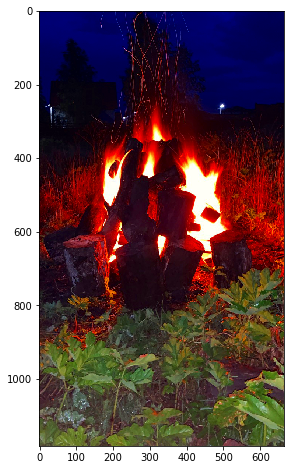

In [17]:
plt.figure(figsize=(8, 8))
plt.imshow(img_new)

## Изменение тона

In [18]:
img_hsv_new = np.copy(img_hsv)
img_hsv_new[:, :, 0] /= 2
img_new = hsv2rgb(img_hsv_new)

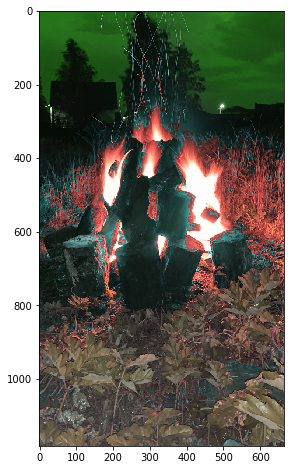

In [19]:
plt.figure(figsize=(8, 8))
plt.imshow(img_new)

## Бинаризация по порогу

In [25]:
img = imageio.imread('flame.jpeg')
img = img.astype(np.float32) / 255.

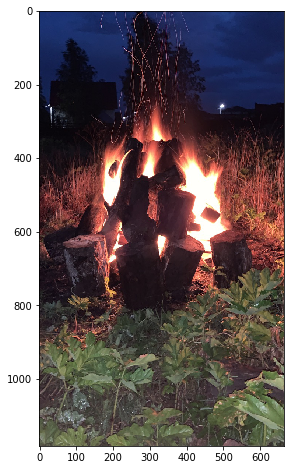

In [26]:
plt.figure(figsize=(8, 8))
plt.imshow(img)

In [27]:
threshold = 0.45 # порог бинаризации
img_bw = np.mean(img, axis=2)
img_bin = (img_bw > threshold).astype(np.uint8)

In [28]:
img_bin[:5, :5]

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]], dtype=uint8)

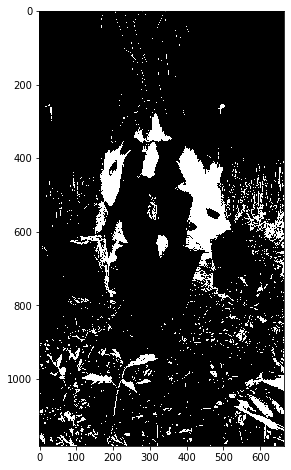

In [29]:
plt.figure(figsize=(8, 8))
plt.imshow(img_bin*255, cmap='gray')